In [4]:
import sys
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile
import sklearn as sk
import librosa 
import heartpy as hp
import soundfile as sf
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

In [6]:
src_signal = librosa.load("LAB5_500HzFHR.wav", sr=None)

sample_rate = src_signal[1]
source_signal = src_signal[0]

N = source_signal.size

Ts = 1.0 / sample_rate
fft_src = fft(source_signal)

yf = 2.0/N * np.abs(fft_src[:N//2])

x = np.linspace(0.0, N*Ts, N)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)


b, a =  signal.iirdesign(2, 4, gpass=1, gstop=40, ftype='butter', fs=sample_rate)
signal_filtered = signal.lfilter(b, a, source_signal)

freq_s = fftfreq(N, Ts)[:N//2]
fft_flt = fft(signal_filtered)

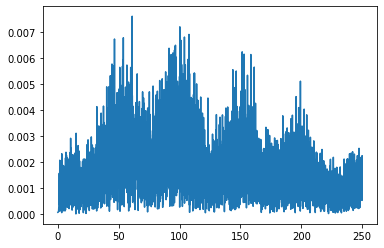

In [7]:
plt.plot(freq_s, yf)
plt.show(block=False)


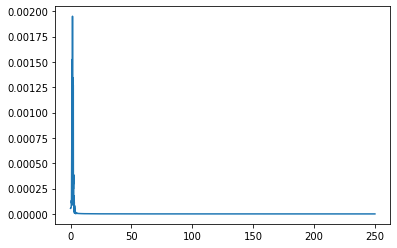

In [8]:
plt.plot(freq_s, 2.0/N * np.abs(fft_flt[0:N//2]))
plt.show(block=False)

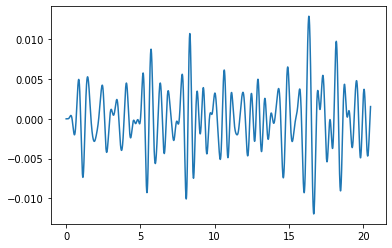

In [9]:
plt.plot(x, signal_filtered)
plt.show(block=False)

C:\Users\Kaliban\anaconda3\envs\starsec\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


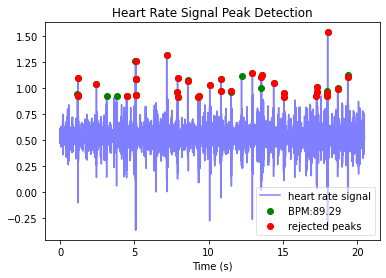

In [10]:
working_data, measures = hp.process(source_signal, 500.0)
working_data_flt, measures_flt = hp.process(signal_filtered, 500.0)

bpm_flt = hp.plotter(working_data, measures, show=True)
plt.show(block=False)

C:\Users\Kaliban\anaconda3\envs\starsec\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


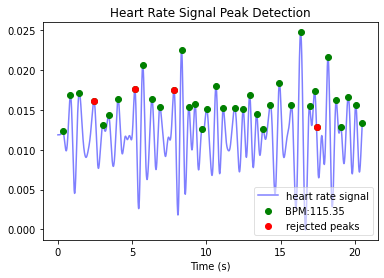

In [11]:
bpm_flt = hp.plotter(working_data_flt, measures_flt, show=True)
plt.show(block=False)

C:\Users\Kaliban\anaconda3\envs\starsec\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


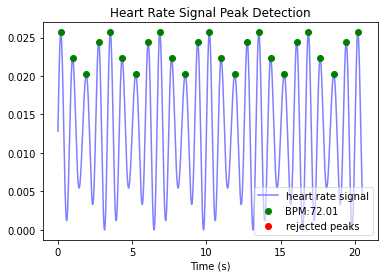

In [17]:
y1 = 0.01 * np.sin(1.2 * x * 2 * np.pi)
y2 = 0.01 * np.sin(1.5 * x * 2 * np.pi)
Y = y1+y2
working_data_t, measures_t = hp.process(Y, 500.0)
bpm_flt = hp.plotter(working_data_t, measures_t, show=True)
plt.show(block=False)


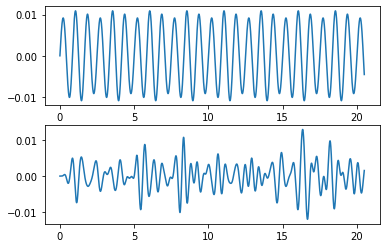

In [15]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(x, y1+y2)
ax2.plot(x, signal_filtered)

plt.show()